In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

In [7]:
df_customers = pd.read_csv("dataset/customers.csv")
df_loans = pd.read_csv("dataset/loans.csv")
df_bureau = pd.read_csv("dataset/bureau_data.csv")

In [9]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [11]:
df_customers.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001


In [13]:
df_loans.head(3)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [15]:
df = pd.merge(df_customers, df_loans, on='cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [17]:
df_bureau.head(3)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58


In [19]:
df = pd.merge(df, df_bureau, on='cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [21]:
df = pd.merge(df, df_bureau, on='cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,total_dpd_x,enquiry_count_x,credit_utilization_ratio_x,number_of_open_accounts_y,number_of_closed_accounts_y,total_loan_months_y,delinquent_months_y,total_dpd_y,enquiry_count_y,credit_utilization_ratio_y
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,0,3,7,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,60,5,4,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,147,6,58,2,1,82,24,147,6,58


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

### DEFAULT DTYPE IS BOOL &  MUST CONVERT INTO INT 

In [26]:
df['default'] = df['default'].astype(int)
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

### DUE TO DATALEAKAGE PREVENTION  WE ARE DOING TRAIN-TEST SPLIT

In [29]:
X = df.drop("default", axis="columns")
y = df['default']

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)

df_train = pd.concat([X_train, y_train], axis="columns")
df_test = pd.concat([X_test, y_test], axis="columns")

df_train.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,enquiry_count_x,credit_utilization_ratio_x,number_of_open_accounts_y,number_of_closed_accounts_y,total_loan_months_y,delinquent_months_y,total_dpd_y,enquiry_count_y,credit_utilization_ratio_y,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,4,36,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,5,5,3,1,160,10,62,5,5,0


### DATA CLEANING 

In [32]:
df_train.shape

(37500, 40)

In [34]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts_x       0
number_of_closed_accounts_x     0
total_loan_months_x             0
delinquent_months_x             0
total_dpd_x   

### residence_type CONTAINS NULL

In [37]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [39]:
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [41]:
df_train.residence_type.fillna(mode_residence, inplace=True)
df_test.residence_type.fillna(mode_residence, inplace=True)

df_train.residence_type.unique(), df_test.residence_type.unique()

C:\Users\Aman\AppData\Local\Temp\ipykernel_1332\2805913581.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence, inplace=True)
C:\Users\Aman\AppData\Local\Temp\ipykernel_1332\2805913581.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


(array(['Owned', 'Mortgage', 'Rented'], dtype=object),
 array(['Owned', 'Mortgage', 'Rented'], dtype=object))

In [43]:
df_train.duplicated().sum()

0

In [45]:
df_train.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,...,enquiry_count_x,credit_utilization_ratio_x,number_of_open_accounts_y,number_of_closed_accounts_y,total_loan_months_y,delinquent_months_y,total_dpd_y,enquiry_count_y,credit_utilization_ratio_y,default
count,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,...,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00
mean,39.54,2633326.16,1.94,16.00,418866.25,4699691.57,3996067.73,80290.68,719292.19,3196854.19,...,5.01,43.42,2.50,1.00,76.11,4.84,26.67,5.01,43.42,0.09
std,9.86,2623780.52,1.54,8.92,169035.02,6257832.98,5371862.29,113128.14,966935.21,4297489.83,...,2.03,29.39,1.12,0.81,43.77,5.84,32.78,2.03,29.39,0.28
min,18.00,0.00,0.00,1.00,110001.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
25%,33.00,802000.00,0.00,8.00,302001.00,1142000.00,961000.00,19220.00,172980.00,768800.00,...,4.00,18.00,1.00,0.00,42.00,0.00,0.00,4.00,18.00,0.00
50%,39.00,1885000.00,2.00,16.00,400001.00,2644000.00,2230000.00,44600.00,401400.00,1784000.00,...,5.00,39.00,3.00,1.00,71.00,3.00,13.00,5.00,39.00,0.00
75%,46.00,3326250.00,3.00,24.00,560001.00,5178000.00,4619000.00,92420.00,831420.00,3695200.00,...,6.00,67.00,4.00,2.00,107.00,8.00,46.00,6.00,67.00,0.00
max,70.00,11999000.00,5.00,31.00,700001.00,52175000.00,47819000.00,5293543.52,8607420.00,38255200.00,...,9.00,99.00,4.00,2.00,223.00,24.00,171.00,9.00,99.00,1.00


In [54]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts_x',
       'number_of_closed_accounts_x', 'total_loan_months_x',
       'delinquent_months_x', 'total_dpd_x', 'enquiry_count_x',
       'credit_utilization_ratio_x', 'number_of_open_accounts_y',
       'number_of_closed_accounts_y', 'total_loan_months_y',
       'delinquent_months_y', 'total_dpd_y', 'enquiry_count_y',
       'credit_utilization_ratio_y', 'default'],
      dtype='object')

In [56]:
columns_continuous = [
    'age',
    'income',
    'number_of_dependants',
    'years_at_current_address',
    'sanction_amount',
    'loan_amount',
    'processing_fee',
    'gst',
    'net_disbursement',
    'loan_tenure_months',
    'principal_outstanding',
    'bank_balance_at_application',

    'number_of_open_accounts_x',
    'number_of_closed_accounts_x',
    'total_loan_months_x',
    'delinquent_months_x',
    'total_dpd_x',
    'enquiry_count_x',
    'credit_utilization_ratio_x',


    'number_of_open_accounts_y',
    'number_of_closed_accounts_y',
    'total_loan_months_y',
    'delinquent_months_y',
    'total_dpd_y',
    'enquiry_count_y',
    'credit_utilization_ratio_y'
]
columns_categorical = [
    'gender',
    'marital_status',
    'employment_status',
    'residence_type',
    'city',
    'state',
    'zipcode',
    'loan_purpose',
    'loan_type',
    'default'
]



### VISUALIZE OUTLIERS

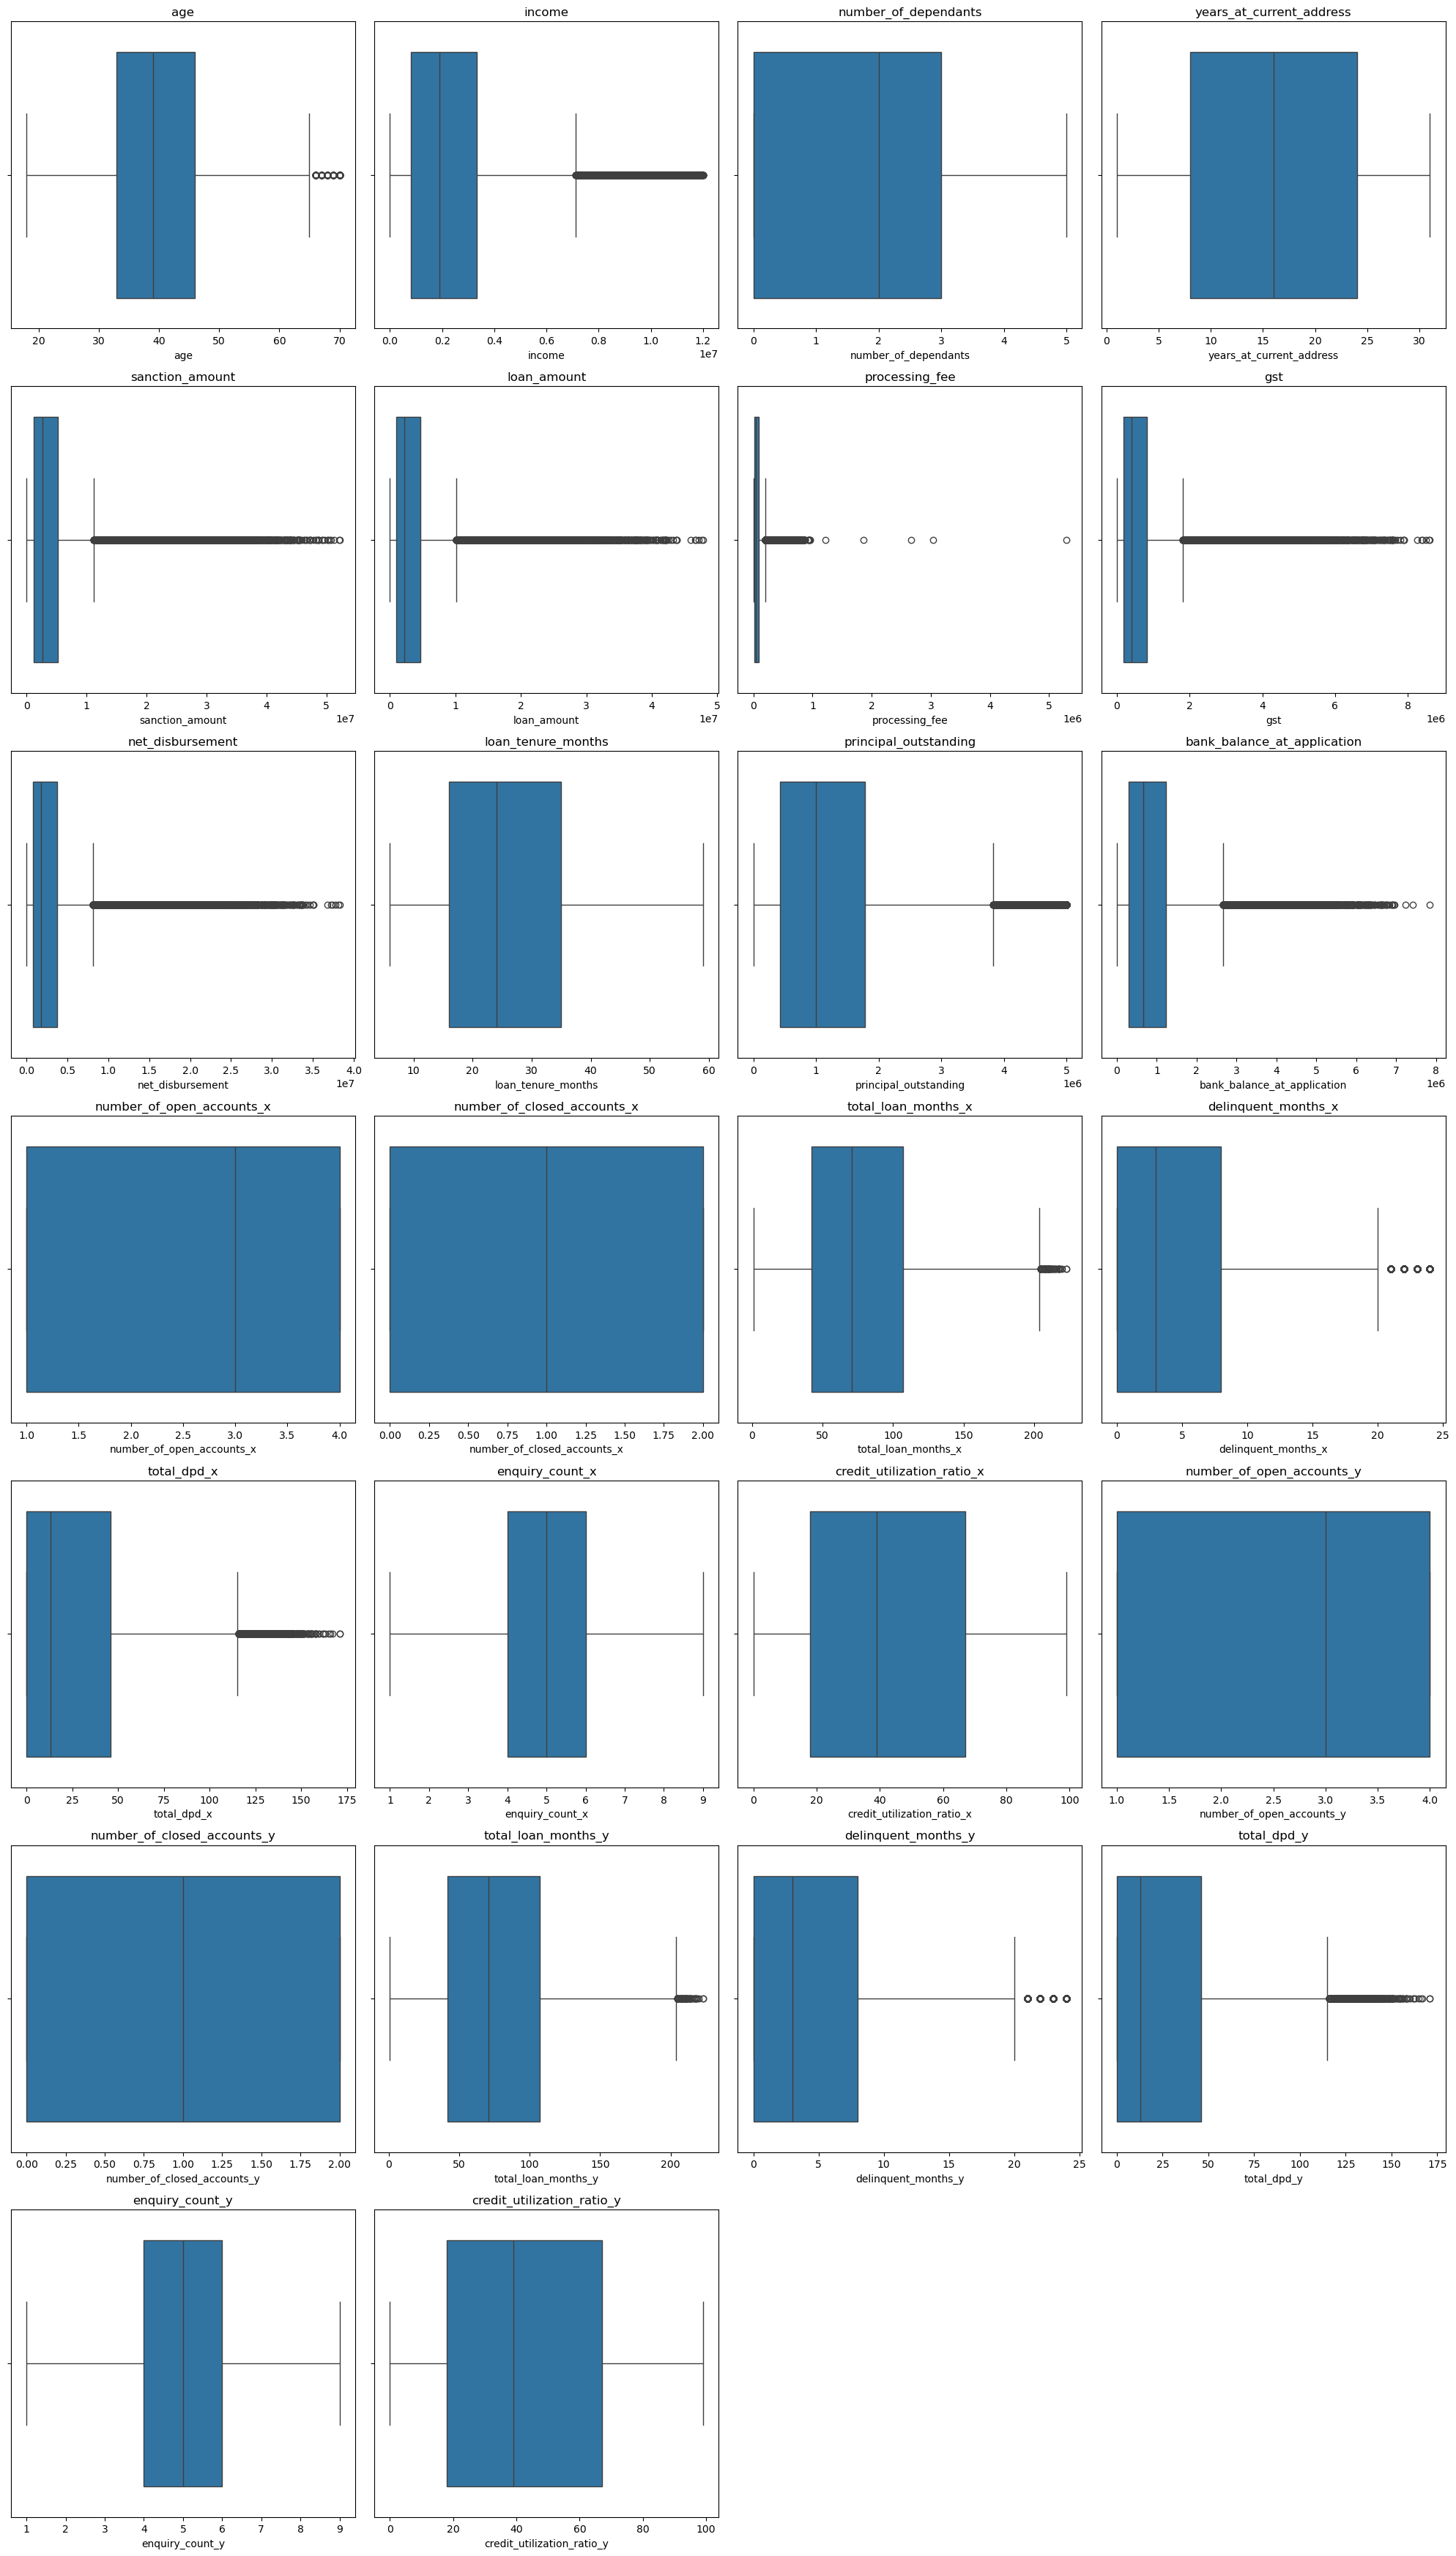

In [59]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

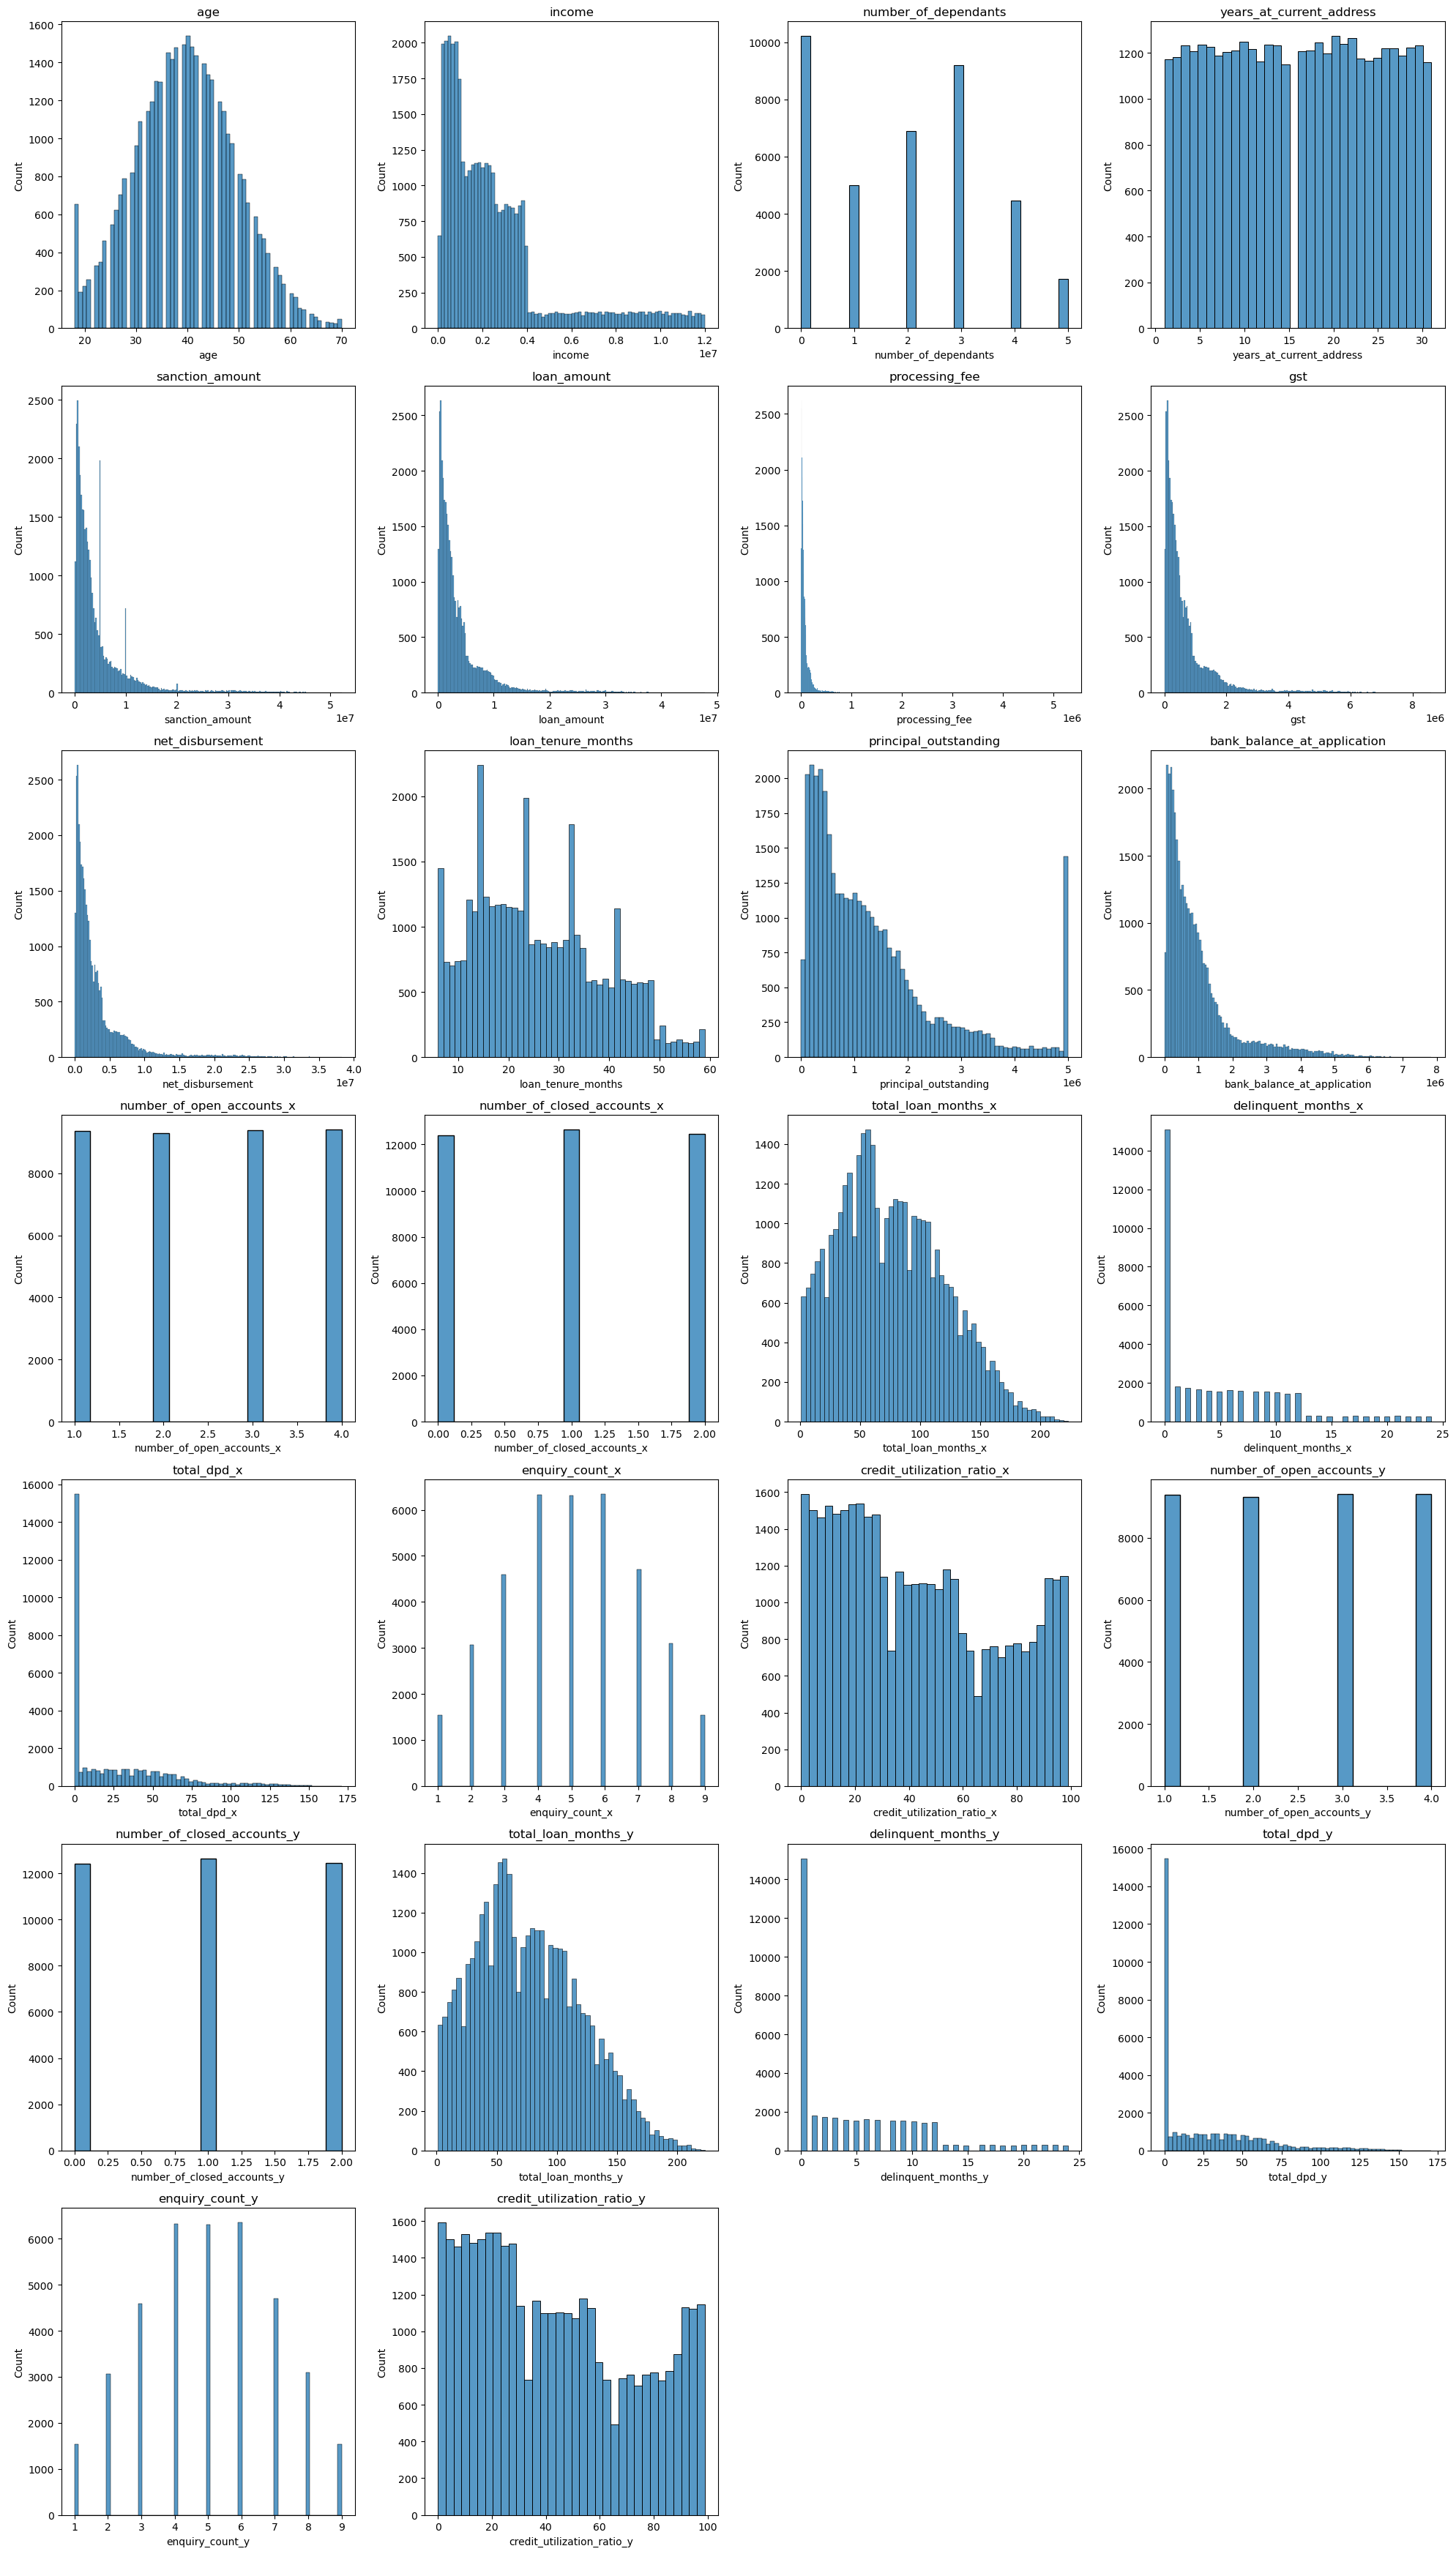

In [62]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.histplot(df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### OUTLIERS REMOVING 